# **Zomato Sales Analysis**

In [ ]:
**Executive Summary**

This Zomato sales analysis examines 148 restaurants, providing actionable insights into customer behavior and business trends:

- **Restaurant Types:** Dine-out restaurants dominate the market, accounting for the largest share. Buffet and other types are 
less prevalent, with dine-out options representing over 50% of all listings, indicating a strong customer preference for this format.
- **Customer Engagement:** Dine-out restaurants received the highest number of votes, capturing more than 60% of 
total customer engagement, confirming their popularity.
- **Ratings:** Over 60% of restaurants have ratings between 3.5 and 4.5, reflecting generally high customer 
satisfaction and consistent service quality.
- **Average Spending:** The most frequent average cost for two people is ₹300, chosen by more than 40% of couples.
 This suggests that affordability is a key factor in restaurant selection.
- **Online vs Offline Orders:** Restaurants offering online orders have a higher average rating (by approximately 0.5 points) 
compared to those without, demonstrating that online availability positively impacts customer perception and satisfaction.
- **Heatmap Insights:** The heatmap reveals that dine-out restaurants are most likely to offer online ordering, reinforcing 
the shift towards digital convenience and accessibility.

**Conclusion:**  
Customers overwhelmingly prefer affordable, dine-out restaurants with online ordering options. 
These establishments receive higher ratings and engagement, highlighting the importance of affordability and 
digital convenience in driving customer satisfaction and business success.


In [67]:
## Using Libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

set = sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


In [19]:
## Import the dataframe of Zomato.

df = pd.read_csv('C:/Users/DELL/Downloads/Zomato_data .csv') 


In [22]:
# Display the first few rows of the dataframe
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [29]:
df.shape

(148, 7)

In [27]:
# Display the summary information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [30]:
# Check for missing values in the dataframe

df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [33]:
# Check for duplicate rows in the dataframe

df.duplicated().sum()


np.int64(0)

In [32]:
# Display the statistical summary of the numerical columns in the dataframe

df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [34]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
# Convert the data type of column - rate.

def handle_rate(value):
    try:
        return float(str(value).split('/')[0])
    except:
        return np.nan

In [42]:
df['rate'] = df['rate'].apply(handle_rate)

In [43]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


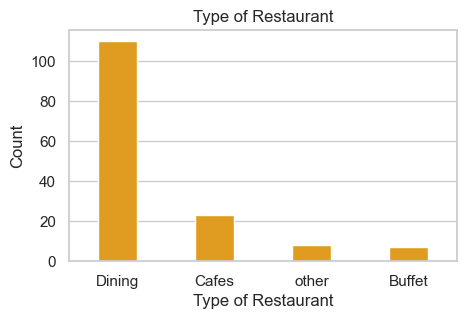

In [68]:
## Type of Restaurant

plt.figure(figsize=(5,3))
sns.countplot(x = 'listed_in(type)', data = df, color = 'orange', width=0.4,
              order = df['listed_in(type)'].value_counts().index)
plt.title('Type of Restaurant')
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.show()

## Conclusion = Majority of the restaurants falls in Dining category.

In [65]:
# Grouping the data columns
Group_data = df.groupby('listed_in(type)')['votes'].sum()

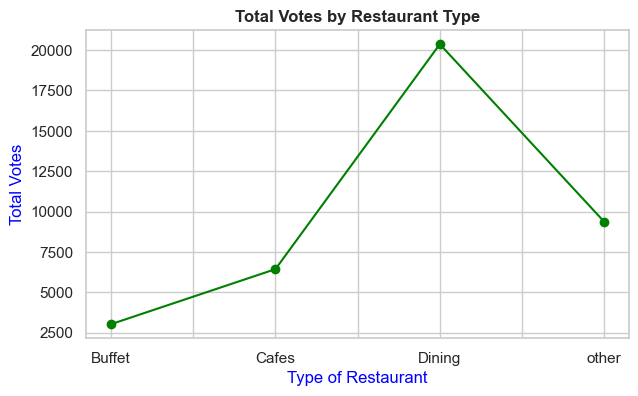

In [77]:
# Plotting the grouped data of votes by restaurant type.
Group_data.plot(kind = 'line', figsize= (7,4), color = 'green', marker = 'o')
plt.title('Total Votes by Restaurant Type', fontweight = 'bold')
plt.xlabel('Type of Restaurant', color = 'blue')
plt.ylabel('Total Votes', color = 'blue')
plt.show()

# Conclusion = Dinning Resturants has recieved maximum votes.

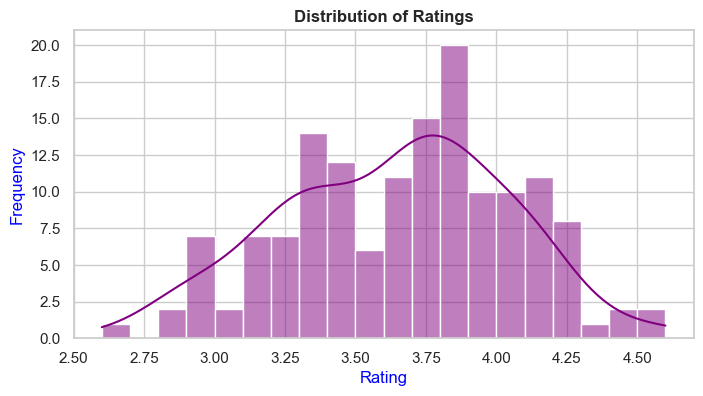

In [84]:
# Checking the distribution of ratings.

plt.figure(figsize = (8,4))
sns.histplot(df['rate'], bins=20, kde=True, color='purple')
plt.title('Distribution of Ratings', fontweight = 'bold')
plt.xlabel('Rating', color = 'blue')
plt.ylabel('Frequency', color = 'blue')
plt.show()


# Conclusion = The majority restaurant received rating between 3.5 to 4.5

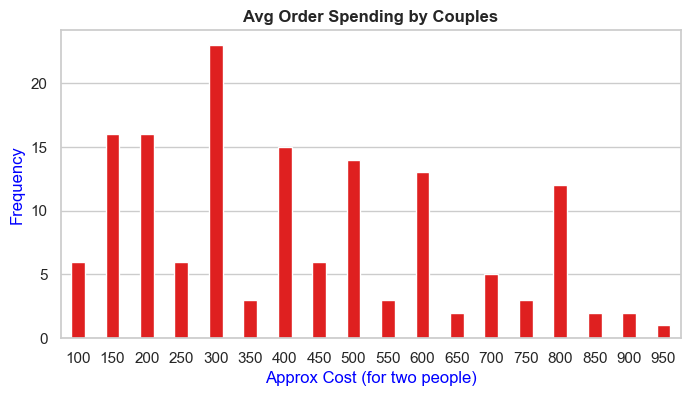

In [ ]:
## Avg Order spending by couples.

couple_data = df['approx_cost(for two people)']

plt.figure(figsize = (8,4))
sns.countplot(x = couple_data, color = 'red', width=0.4)
plt.title('Avg Order Spending by Couples',fontweight = 'bold')
plt.xlabel('Approx Cost (for two people)', color = 'blue')
plt.ylabel('Frequency', color = 'blue')
plt.show()


# Conclusion = The majority of couples preferr resturants with an approximents cost of 300 rupees.

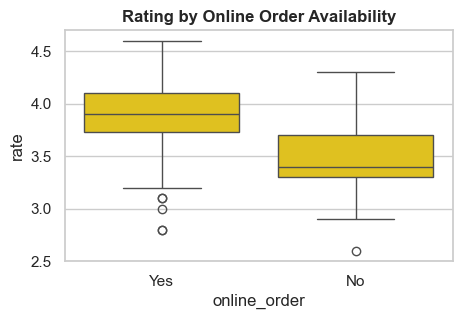

In [99]:
### Which mode receives maximum rating.

plt.figure(figsize=(5,3))
sns.boxplot(x = 'online_order', y = 'rate', data = df, color = 'gold')
plt.title('Rating by Online Order Availability', fontweight = 'bold')
plt.show()


# Conclusion = Offline order recevied lower rating in comparison to online order.

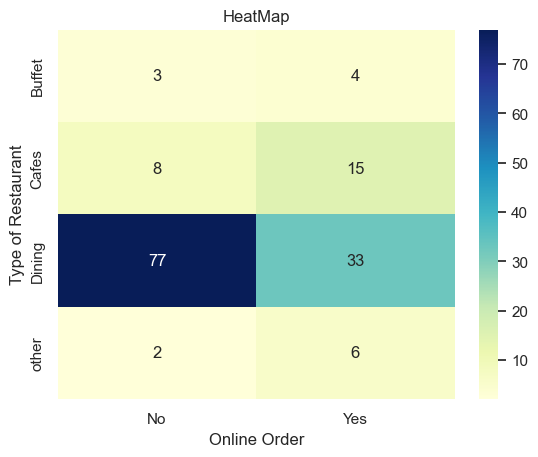

In [ ]:
## Heat Map.

pivot_table = df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc='size', fill_value = 0)

sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu')
plt.title('HeatMap')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.show()


# Conclusion = Dining restaurants primarily accept offline orders. whereas cafes primarily receive online orders. 
#                   This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes.
